# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [169]:
import pandas as pd
import numpy as np


In [171]:
data = pd.read_csv('https://raw.githubusercontent.com/ramsha275/ML_Datasets/main/compresive_strength_concrete.csv')

In [172]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Check Missing Values ( If Exist ; Fill each record with mean of its feature )


In [173]:
data.isna().sum(axis=0)

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [174]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

Standardized the Input Variables. Hint: Centeralized the data

In [175]:
mean = X.mean(axis=0)

In [176]:
X -= mean

In [177]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,67.081068,-97.580485,-17.662136
1,258.832136,-73.895825,-54.18835,-19.567282,-3.70466,82.081068,-97.580485,-17.662136
2,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,224.337864
3,51.332136,68.604175,-54.18835,46.432718,-6.20466,-40.918932,-179.580485,319.337864
4,-82.567864,58.504175,-54.18835,10.432718,-6.20466,5.481068,51.919515,314.337864
...,...,...,...,...,...,...,...,...
1025,-4.767864,42.104175,36.11165,-1.967282,2.69534,-102.818932,-5.280485,-17.662136
1026,41.032136,-73.895825,61.41165,14.432718,4.19534,-155.018932,39.819515,-17.662136
1027,-132.667864,65.504175,54.41165,11.132718,-0.10466,-80.518932,6.419515,-17.662136
1028,-122.067864,112.804175,-54.18835,-5.967282,5.09534,16.681068,15.319515,-17.662136


In [178]:
std = X.std(axis=0)

In [179]:
std

Cement (component 1)(kg in a m^3 mixture)                104.506364
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.279342
Fly Ash (component 3)(kg in a m^3 mixture)                63.997004
Water  (component 4)(kg in a m^3 mixture)                 21.354219
Superplasticizer (component 5)(kg in a m^3 mixture)        5.973841
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.753954
Fine Aggregate (component 7)(kg in a m^3 mixture)         80.175980
Age (day)                                                 63.169912
dtype: float64

In [180]:
X /= std

In [181]:
X

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597


Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [122]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [182]:
size = len(X)

In [183]:
size

1030

In [184]:
train_data = X[:int(size*0.50)].values
train_targets = Y[:int(size*0.50)].values

In [185]:
test_data = X[int(size*0.50) : int(size*0.80)].values
test_targets = Y[int(size*0.50) : int(size*0.80)].values

In [186]:
test_targets

array([21.97,  9.85, 15.07, 23.25, 43.73, 13.4 , 24.13, 44.52, 62.94,
       59.49, 25.12, 23.64, 35.75, 38.61, 68.75, 66.78, 23.85, 32.07,
       11.65, 19.2 , 48.85, 39.6 , 43.94, 34.57, 54.32, 24.4 , 15.62,
       21.86, 10.22, 14.6 , 18.75, 31.97, 23.4 , 25.57, 41.68, 27.74,
        8.2 ,  9.62, 25.42, 15.69, 27.94, 32.63, 17.24, 19.77, 39.44,
       25.75, 33.08, 24.07, 21.82, 21.07, 14.84, 32.05, 11.96, 25.45,
       22.49, 25.22, 39.7 , 13.09, 38.7 ,  7.51, 17.58, 21.18, 18.2 ,
       17.2 , 22.63, 21.86, 12.37, 25.73, 37.81, 21.92, 33.04, 14.54,
       26.91,  8.  , 31.9 , 10.34, 19.77, 37.44, 11.48, 24.44, 17.6 ,
       10.73, 31.38, 13.22, 20.97, 27.04, 32.04, 35.17, 36.45, 38.89,
        6.47, 12.84, 18.42, 21.95, 24.1 , 25.08, 21.26, 25.97, 11.36,
       31.25, 32.33, 33.7 ,  9.31, 26.94, 27.63, 29.79, 34.49, 36.15,
       12.54, 27.53, 32.92,  9.99,  7.84, 12.25, 11.17, 17.34, 17.54,
       30.57, 14.2 , 24.5 , 15.58, 26.85, 26.06, 38.21, 43.7 , 30.14,
       12.73, 20.87,

In [187]:
val_data = X[int(size*0.80):].values
val_targets = Y[int(size*0.80):].values

In [188]:
from tensorflow.keras import models , layers, regularizers

In [196]:
model = models.Sequential()

In [197]:
model.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l1(0.3),input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [198]:
history = model.fit(train_data,train_targets, epochs=50, batch_size= 1, validation_data=(val_data,val_targets))

Epoch 1/50
515/515 [==============================] - 1s 1ms/step - loss: 2037.6637 - mae: 41.6087 - val_loss: 712.7925 - val_mae: 23.3422
Epoch 2/50
515/515 [==============================] - 1s 1ms/step - loss: 804.9045 - mae: 23.0911 - val_loss: 254.5086 - val_mae: 12.8600
Epoch 3/50
515/515 [==============================] - 1s 1ms/step - loss: 245.9783 - mae: 12.1694 - val_loss: 195.4589 - val_mae: 11.1694
Epoch 4/50
515/515 [==============================] - 1s 1ms/step - loss: 203.3943 - mae: 11.2419 - val_loss: 179.5374 - val_mae: 10.5188
Epoch 5/50
515/515 [==============================] - 1s 1ms/step - loss: 193.3190 - mae: 10.6253 - val_loss: 176.7282 - val_mae: 10.4381
Epoch 6/50
515/515 [==============================] - 1s 1ms/step - loss: 174.7545 - mae: 9.9921 - val_loss: 188.6427 - val_mae: 10.7372
Epoch 7/50
515/515 [==============================] - 1s 1ms/step - loss: 193.1520 - mae: 10.5424 - val_loss: 172.8172 - val_mae: 10.0843
Epoch 8/50
515/515 [==============

In [199]:
eval_dict = history.history

In [200]:
df = pd.DataFrame(eval_dict)

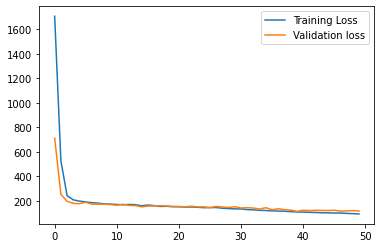

In [201]:
df.plot(y=['loss', 'val_loss'],label = ['Training Loss', "Validation loss"])

In [202]:
model.predict(test_data)

array([[24.689161],
       [20.665293],
       [21.192165],
       [28.973402],
       [39.660458],
       [32.63531 ],
       [33.633488],
       [45.99832 ],
       [50.38752 ],
       [50.38752 ],
       [40.783867],
       [40.783867],
       [42.320454],
       [42.320454],
       [60.116505],
       [60.116505],
       [36.41397 ],
       [29.72103 ],
       [21.406246],
       [30.797659],
       [38.856167],
       [34.043713],
       [42.074955],
       [40.07366 ],
       [47.382854],
       [39.657795],
       [24.571302],
       [28.430576],
       [20.037695],
       [21.530767],
       [22.501905],
       [27.746655],
       [24.862394],
       [24.071287],
       [32.928207],
       [31.201931],
       [19.893442],
       [25.921412],
       [43.41232 ],
       [27.72581 ],
       [35.160114],
       [37.719418],
       [29.508635],
       [31.291502],
       [47.705837],
       [30.80924 ],
       [38.16064 ],
       [33.857796],
       [36.32304 ],
       [30.612158],


In [203]:
corr = data.corr()

In [204]:
corr.style.background_gradient(cmap='coolwarm')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [205]:

import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [207]:
predict = model.predict(X)

In [208]:
predict

array([[62.879993],
       [63.328396],
       [54.23863 ],
       ...,
       [26.110172],
       [34.817398],
       [29.065992]], dtype=float32)